# **MARCO TEÓRICO Y METODOLÓGICO PARA EL PRONÓSTICO DE PRECIOS POR $M^2$, DEMANDA EN EL MALECÓN DE MAZATLÁN**

## **Introducción**

El desarrollo inmobiliario en zonas costeras es un fenómeno impulsado por factores económicos, turísticos y urbanos. Mazatlán, como destino turístico y de inversión, presenta una dinámica de crecimiento relevante, especialmente en el **Malecón**. Este estudio tiene como objetivo pronosticar los **precios**, la **demanda** en la zona para finales del año en curso y proximos.

### **1. Recopilación y Preparación de Datos**

Los datos utilizados en este estudio provienen de diversas fuentes económicas, sociales y del mercado inmobiliario.

#### **Datos a utilizar**

- **Factores económicos**: Impacto del crecimiento del PIB, inflación, tasas de interés, empleo, entre otros.
    - **PIB México**
         *Se utilizarán datos del Producto Interno Bruto (PIB) de Mazatlán desde 2017 hasta 2023 para calcular la probabilidad de cada escenario.*

    - **Índice Nacional de Precios al Consumidor (INPC)** 
        *El índice de precios al consumidor en México es fundamental para entender la inflación y su impacto en los precios inmobiliarios.*

    - **Tasas de Interés**
        *Las tasas de interés tienen un efecto directo en los créditos hipotecarios y la inversión inmobiliaria.*

    - **Desempleo Anual en México**
        *El nivel de desempleo en Sinaloa también influye en la capacidad adquisitiva de los compradores potenciales.*

**1.1 Factores económicos**



In [17]:
# Librerias con las que se van a trabajar 
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [18]:
# PIP México 
pib__mex= {
    'Año': [
    "01/10/2016",
    "01/01/2017", "01/04/2017", "01/07/2017", "01/10/2017",
    "01/01/2018", "01/04/2018", "01/07/2018", "01/10/2018",
    "01/01/2019", "01/04/2019", "01/07/2019", "01/10/2019",
    "01/01/2020", "01/04/2020", "01/07/2020", "01/10/2020",
    "01/01/2021", "01/04/2021", "01/07/2021", "01/10/2021",
    "01/01/2022", "01/04/2022", "01/07/2022", "01/10/2022",
    "01/01/2023", "01/04/2023", "01/07/2023", "01/10/2023",
    "01/01/2024", "01/04/2024", "01/07/2024", "01/10/2024",
],
    'PIB MEX': [
        22014450.811,
        21923233.47, 22351037.37, 22424378.37, 23446191.82, 
        23181578.75, 24136868.09, 24262574.51, 25125660.14, 
        24545403.86, 25036472.55, 25182909.70, 25722507.11, 
        25329753.89, 20799463.93, 24267620.88, 25950193.84, 
        25661431.10, 26634327.97, 26611404.35, 27852970.14, 
        27959958.64, 29442358.08, 29732283.22, 30929609.23, 
        30436250.55, 31585234.47, 32096907.63, 33303872.54, 
        32082079.19, 33903155.10, 34346806.95, 35323276.08
    ]}
# Convertir en un Dataframe
pib__mex = pd.DataFrame(pib__mex)


# Calcular la tasa de crecimiento anual
pib__mex["PIB_Crecimiento"] = pib__mex["PIB MEX"].pct_change() * 100

# Convertir la columna de fecha al formato datetime
pib__mex['Año'] = pd.to_datetime(pib__mex['Año'])

# Filtrar solo las filas cuyo año es mayor o igual a 2017
pib__mex = pib__mex[pib__mex['Año'].dt.year >= 2017]
pib__mex = pib__mex[['Año','PIB_Crecimiento']]




In [19]:
# Inflación en México 
inflacion_anual = {
    2017: 4.72,
    2018: 5.55,
    2019: 4.37,
    2020: 3.24,
    2021: 3.53,
    2022: 7.07,
    2023: 7.91,
    2024: 4.88,
}

# Convertir inflación anual a trimestral
inflacion_trimestral = {
    year: (1 + rate / 100) ** (1/4) - 1 for year, rate in inflacion_anual.items()
}

# Convertir a porcentaje
inflacion_trimestral = {year: rate * 100 for year, rate in inflacion_trimestral.items()}

# Fechas trimestrales
fechas = [
    "01/01/2017", "01/04/2017", "01/07/2017", "01/10/2017",
    "01/01/2018", "01/04/2018", "01/07/2018", "01/10/2018",
    "01/01/2019", "01/04/2019", "01/07/2019", "01/10/2019",
    "01/01/2020", "01/04/2020", "01/07/2020", "01/10/2020",
    "01/01/2021", "01/04/2021", "01/07/2021", "01/10/2021",
    "01/01/2022", "01/04/2022", "01/07/2022", "01/10/2022",
    "01/01/2023", "01/04/2023", "01/07/2023", "01/10/2023",
    "01/01/2024", "01/04/2024", "01/07/2024", "01/10/2024",
]

# Asignar inflación trimestral a cada fecha
inflacion_values = []
for year in range(2017, 2025):
    inflacion_values.extend([inflacion_trimestral[year]] * 4)

# 
df_inflacion = pd.DataFrame({"Año": fechas, "Inflación": inflacion_values})

# Convertir fechas a tipo datetime
df_inflacion["Año"] = pd.to_datetime(df_inflacion["Año"], format="%d/%m/%Y")


In [20]:
# Tasa de interes 
tasa_inf = pd.read_csv("C:/Users/julio_2h7cnt5/OneDrive/Documentos/Ideas Frescas/Bases de datos/Tasa de Interes Historica/Tasas de interes Historica.csv")

# Convertir la columna de fecha al formato datetime (con dayfirst=True)
tasa_inf['Fecha'] = pd.to_datetime(tasa_inf['Fecha'], dayfirst=True)

# Filtrar los datos de 2017 a 2024
tasa_inf = tasa_inf[(tasa_inf["Fecha"].dt.year >= 2017) & (tasa_inf["Fecha"].dt.year <= 2024)]

# Agregar las columnas de Trimestre y Año
tasa_inf["Trimestre"] = tasa_inf["Fecha"].dt.to_period("Q").dt.start_time

# Convertir "Trimestre" a formato "dd/mm/yyyy"
tasa_inf["Trimestre"] = tasa_inf["Trimestre"].dt.strftime("%d/%m/%Y")

# Calcular la tasa promedio trimestral
tasa_trimestral = tasa_inf.groupby("Trimestre")["Tasa objetivo"].mean().reset_index()

# Agregar columna de Año para ordenar
tasa_trimestral["Año"] = pd.to_datetime(tasa_trimestral["Trimestre"], format="%d/%m/%Y").dt.year

# Convertir la columna "Trimestre" a tipo datetime para ordenarla correctamente
tasa_trimestral["Trimestre"] = pd.to_datetime(tasa_trimestral["Trimestre"], format="%d/%m/%Y")

# Ordenar por "Trimestre" de forma ascendente
tasa_trimestral = tasa_trimestral.sort_values(by="Trimestre", ascending=True)

# Eliminar la columna "Año"
tasa_trimestral = tasa_trimestral.drop(columns=["Año"], errors="ignore")


In [21]:
# Tase de empleo en México
empleo_sin = {
    'Año': [
    "01/01/2017", "01/04/2017", "01/07/2017", "01/10/2017",
    "01/01/2018", "01/04/2018", "01/07/2018", "01/10/2018",
    "01/01/2019", "01/04/2019", "01/07/2019", "01/10/2019",
    "01/01/2020", "01/04/2020", "01/07/2020", "01/10/2020",
    "01/01/2021", "01/04/2021", "01/07/2021", "01/10/2021",
    "01/01/2022", "01/04/2022", "01/07/2022", "01/10/2022",
    "01/01/2023", "01/04/2023", "01/07/2023", "01/10/2023",
    "01/01/2024", "01/04/2024", "01/07/2024", "01/10/2024",
],
    'Tasa de empleo': [
        0.592222283, 0.593385933, 0.594125154, 0.594244974, 
        0.589502597, 0.597880823, 0.598221458, 0.596970409, 
        0.594525712, 0.601875768, 0.604019058, 0.604005766,
        0.598513198, 0.555021445, 0.574927026, np.nan,
        0.571329034, 0.588826638, 0.594256156, 0.596661214, 
        0.58742725,  0.599009022, 0.599427887, 0.604381003, 
        0.602414333,0.601858678, 0.606302676, 0.605346327,
        0.599788453, 0.602474854, 0.60391468, np.nan
    ]
}

# Crear el DataFrame
empleo_sin_data = pd.DataFrame(empleo_sin)

# Convertir la columna "Año" a tipo datetime
empleo_sin_data['Año'] = pd.to_datetime(empleo_sin_data['Año'], format="%d/%m/%Y")

# Usar interpolación lineal para estimar los valores faltantes
empleo_sin_data['Tasa de empleo'] = empleo_sin_data['Tasa de empleo'].interpolate(method='linear')
empleo_sin_data['Tasa de empleo'] = empleo_sin_data['Tasa de empleo']*100

empleo_sin_data = empleo_sin_data[['Año','Tasa de empleo']]



In [22]:
# Tase de desempleo en México
desempleo_sin = {
    'Año': [
    "01/01/2017", "01/04/2017", "01/07/2017", "01/10/2017",
    "01/01/2018", "01/04/2018", "01/07/2018", "01/10/2018",
    "01/01/2019", "01/04/2019", "01/07/2019", "01/10/2019",
    "01/01/2020", "01/04/2020", "01/07/2020", "01/10/2020",
    "01/01/2021", "01/04/2021", "01/07/2021", "01/10/2021",
    "01/01/2022", "01/04/2022", "01/07/2022", "01/10/2022",
    "01/01/2023", "01/04/2023", "01/07/2023", "01/10/2023",
    "01/01/2024", "01/04/2024", "01/07/2024", "01/10/2024",
],
    'Tasa de desempleo': [
        0.03393753, 0.0345889, 0.035520913, 0.033471765,
        0.031394628, 0.033394067, 0.034563963, 0.032639889,
        0.033659109, 0.035372309, 0.037448193, 0.033701578,
        0.03446915, 0.05149617, 0.045623572, np.nan,
        0.043547119, 0.044589409, 0.042382511, 0.036598305, 
        0.034538696, 0.032318724, 0.034297476, 0.029862655,
        0.026580136, 0.028139196, 0.029924843, 0.026850284, 
        0.025422613, 0.026683391, 0.030015887, np.nan

    ]
}

# Crear el DataFrame
desempleo_sin_data = pd.DataFrame(desempleo_sin)

# Convertir la columna "Año" a tipo datetime
desempleo_sin_data['Año'] = pd.to_datetime(desempleo_sin_data['Año'], format="%d/%m/%Y")

# Usar interpolación lineal para estimar los valores faltantes
desempleo_sin_data['Tasa de desempleo'] = desempleo_sin_data['Tasa de desempleo'].interpolate(method='linear')
desempleo_sin_data['Tasa de desempleo'] = desempleo_sin_data['Tasa de desempleo']*100
desempleo_sin_data = desempleo_sin_data[['Año','Tasa de desempleo']]


In [23]:
# Crear un nuevo DataFrame concatenando las columnas

# Cambiar el nombre de la columna "Trimestre" en tasa_trimestral a "Año"
tasa_trimestral.rename(columns={"Trimestre": "Fecha"}, inplace=True) # Formato de fecha para inflación

# Verificar que las fechas estén ordenadas en todos los DataFrames
pib__mex = pib__mex.sort_values(by="Año")
df_inflacion = df_inflacion.sort_values(by="Año")
tasa_trimestral = tasa_trimestral.sort_values(by="Fecha")
empleo_sin_data = empleo_sin_data.sort_values(by="Año")
desempleo_sin_data = desempleo_sin_data.sort_values(by="Año")


# Crear un nuevo DataFrame concatenando las columnas
indicadores = pd.concat([pib__mex['Año'], pib__mex['PIB_Crecimiento'],
                      df_inflacion['Inflación'],
                      tasa_trimestral['Tasa objetivo'],
                      empleo_sin_data['Tasa de empleo'],
                      desempleo_sin_data['Tasa de desempleo']], axis=1)

# Llenar los valores NaN hacia abajo usando bfill() directamente
indicadores[['PIB_Crecimiento', 'Inflación', 'Tasa objetivo', 'Tasa de empleo', 'Tasa de desempleo']] = \
    indicadores[['PIB_Crecimiento', 'Inflación', 'Tasa objetivo', 'Tasa de empleo', 'Tasa de desempleo']].bfill()

indicadores = indicadores.drop(indicadores.index[-1])
indicadores.tail(4)

Año  PIB_Crecimiento  Inflación  Tasa objetivo  Tasa de empleo  \
29 2024-01-01        -3.668622   1.198289       9.752717       60.247485   
30 2024-01-04         5.676303   1.198289      11.250000       60.391468   
31 2024-01-07         1.308586   1.198289      10.337912       60.391468   
32 2024-01-10         2.842969   1.159671       6.038889       59.222228   

    Tasa de desempleo  
29           2.668339  
30           3.001589  
31           3.001589  
32           3.393753


**1.2 Identificar la fase economica historica**


**Definir los Escenarios Económicos**

| **Escenario**  | **Crecimiento del PIB** | **Inflación** | **Tasa de interés** | **Empleo** | **Desempleo** |
|---------------|-------------------------|---------------|---------------------|------------|---------------|
| **Expansión**  | >3%                     | >4%           | Bajando o estable   | Alto       | Bajo          |
| **Normal**     | 1% – 3%                 | 2% – 4%       | Estables            | Estable    | Moderado      |
| **Recesión**   | -1% a 1%                | 1% – 2%       | Subiendo            | Bajo       | Moderado      |
| **Depresión**  | < -1%                   | <=0%          | Muy alto            | Muy bajo   | Alto          |





In [24]:

# Función para asignar una categoría ("Expansión", "Normal", "Recesión", "Depresión") a cada indicador
def asignar_categoria(valor, indicador):
    # Para el PIB
    if indicador == 'PIB_Crecimiento':
        if valor > 3:
            return "Expansión"
        elif valor >= 1:
            return "Normal"
        elif valor >= -1:
            return "Recesión"
        else:
            return "Depresión"
    # Para Inflación
    elif indicador == 'Inflación':
        if valor > 4:
            return "Expansión"
        elif valor >= 2:
            return "Normal"
        elif valor >= 1:
            return "Recesión"
        elif valor <= 0:
            return "Depresión"
        else:
            return "Recesión"
    # Para Tasa objetivo (Tasa de interés)
    elif indicador == 'Tasa objetivo':
        # Usamos umbrales numéricos (puedes ajustarlos según convenga)
        if valor < 1:
            return "Expansión"
        elif valor < 1.5:
            return "Normal"
        elif valor < 1.8:
            return "Recesión"
        else:
            return "Depresión"
    # Para Tasa de empleo
    elif indicador == 'Tasa de empleo':
        # Se asume que una tasa más alta indica un empleo "más alto"
        if valor > 60.63:
            return "Expansión"
        elif valor >= 58:
            return "Normal"
        elif valor >= 55.50:
            return "Recesión"
        else:
            return "Depresión"
    # Para Tasa de desempleo
    elif indicador == 'Tasa de desempleo':
        # Una tasa más baja indica mejores condiciones (Bajo)
        if valor < 2.54:
            return "Expansión"
        elif valor < 3.5:
            return "Normal"
        elif valor < 4.5:
            return "Recesión"
        else:
            return "Depresión"
    else:
        return None

# Función que asigna la fase económica a cada fila basándose en los puntajes de cada indicador.
def asignar_fase(row):
    # Asignamos categorías para cada variable
    cat_pib       = asignar_categoria(row['PIB_Crecimiento'], 'PIB_Crecimiento')
    cat_inflacion = asignar_categoria(row['Inflación'], 'Inflación')
    cat_interes   = asignar_categoria(row['Tasa objetivo'], 'Tasa objetivo')
    cat_empleo    = asignar_categoria(row['Tasa de empleo'], 'Tasa de empleo')
    cat_desempleo = asignar_categoria(row['Tasa de desempleo'], 'Tasa de desempleo')
    
    # Mapeo de categorías a puntajes numéricos: Depresión=0, Recesión=1, Normal=2, Expansión=3
    score_map = {
        "Depresión": 0,
        "Recesión": 1,
        "Normal": 2,
        "Expansión": 3
    }
    
    # Calculamos el puntaje total y el promedio (puedes ajustar el método de agregación)
    puntaje_total = (score_map[cat_pib] + score_map[cat_inflacion] + 
                     score_map[cat_interes] + score_map[cat_empleo] + 
                     score_map[cat_desempleo])
    promedio = puntaje_total / 5
    
    # Asignamos la fase económica basándonos en el puntaje promedio
    if promedio >= 2.5:
        return "Expansión"
    elif promedio >= 1.5:
        return "Normal"
    elif promedio >= 0.5:
        return "Recesión"
    else:
        return "Depresión"
# Aplicamos la función a cada fila del DataFrame
indicadores['Fase_Economica'] = indicadores.apply(asignar_fase, axis=1)

indicadores.tail(4)

Año  PIB_Crecimiento  Inflación  Tasa objetivo  Tasa de empleo  \
29 2024-01-01        -3.668622   1.198289       9.752717       60.247485   
30 2024-01-04         5.676303   1.198289      11.250000       60.391468   
31 2024-01-07         1.308586   1.198289      10.337912       60.391468   
32 2024-01-10         2.842969   1.159671       6.038889       59.222228   

    Tasa de desempleo Fase_Economica  
29           2.668339       Recesión  
30           3.001589         Normal  
31           3.001589       Recesión  
32           3.393753       Recesión

In [25]:

indicadores['Fase_Economica'].value_counts()

Fase_Economica
Recesión     21
Normal        9
Depresión     2
Name: count, dtype: int64


---

### **2 Modelado de Factores Económicos y Asignación de Probabilidades (con Tasa de Empleo y Desempleo)**

**2.1 Simular 10,000 escenarios para calcular la probabilidad de cada fase económica**

**Distribucion de los datos** 

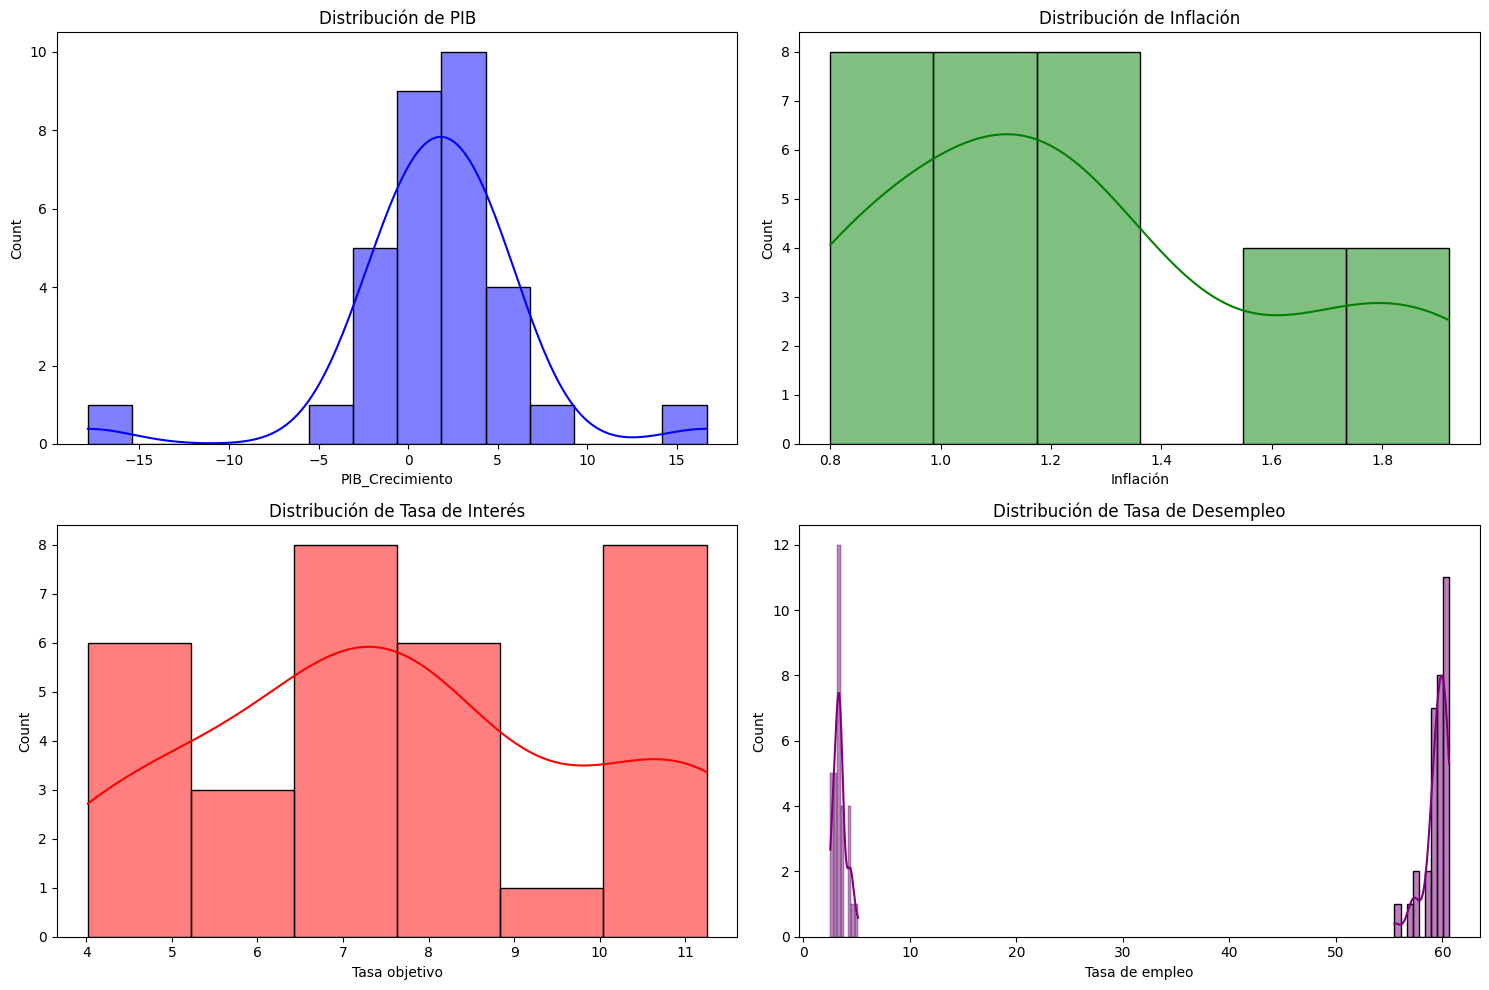

In [26]:
# Distribuciones de las variables
plt.figure(figsize=(15, 10))

# Graficar PIB
plt.subplot(2, 2, 1)
sns.histplot(indicadores['PIB_Crecimiento'], kde=True, color='blue')
plt.title("Distribución de PIB")

# Graficar Inflación
plt.subplot(2, 2, 2)
sns.histplot(indicadores['Inflación'], kde=True, color='green')
plt.title("Distribución de Inflación")

# Graficar Tasa de Interés
plt.subplot(2, 2, 3)
sns.histplot(indicadores['Tasa objetivo'], kde=True, color='red')
plt.title("Distribución de Tasa de Interés")

# Graficar Tasa de Empleo
plt.subplot(2, 2, 4)
sns.histplot(indicadores['Tasa de empleo'], kde=True, color='purple')
plt.title("Distribución de Tasa de Empleo")


# Graficar Tasa de Desempleo
plt.subplot(2, 2, 4)
sns.histplot(indicadores['Tasa de desempleo'], kde=True, color='purple')
plt.title("Distribución de Tasa de Desempleo")

plt.tight_layout()
plt.show()

**Simulación de Monte Carlo**  

Usaremos **Monte Carlo** para generar miles de escenarios y calcular la probabilidad de cada fase económica.  

- Generamos valores aleatorios para el PIB, inflación y tasas de interés, Tasa de empleo y Tasa de desempleo.  
- Usamos distribuciones de probabilidad basadas en datos históricos.  
- Corremos 10,000 simulaciones y calculamos cuántas veces cae cada escenario.  

**Distribucion de los indicadores despues de la simulacion**

In [27]:
# Para crear los nuevos datos con Monte Carlo, vamos a definir una función para cada variable

# Obtener la media y desviación estándar de cada variable
mean_pib = indicadores['PIB_Crecimiento'].mean()
std_pib = indicadores['PIB_Crecimiento'].std()

mean_inflacion = indicadores['Inflación'].mean()
std_inflacion = indicadores['Inflación'].std()

mean_tasa_interes = indicadores['Tasa objetivo'].mean()
std_tasa_interes = indicadores['Tasa objetivo'].std()

mean_tasa_empleo = indicadores['Tasa de empleo'].mean()
std_tasa_empleo = indicadores['Tasa de empleo'].std()

mean_tasa_desempleo = indicadores['Tasa de desempleo'].mean()
std_tasa_desempleo = indicadores['Tasa de desempleo'].std()


# Generamos los nuevos datos para cada variable
n_simulaciones = 10000  # Número de simulaciones

simulacion_pib = np.random.normal(mean_pib, std_pib, n_simulaciones)
simulacion_inflacion = np.random.normal(mean_inflacion, std_inflacion, n_simulaciones)
simulacion_tasa_interes = np.random.normal(mean_tasa_interes, std_tasa_interes, n_simulaciones)
simulacion_tasa_empleo = np.random.normal(mean_tasa_empleo, std_tasa_empleo, n_simulaciones)
simulacion_tasa_desempleo = np.random.normal(mean_tasa_desempleo, std_tasa_desempleo, n_simulaciones)

# Creamos un DataFrame con los datos simulados
df_simulado = pd.DataFrame({
    'PIB_Crecimiento': simulacion_pib,
    'Inflación': simulacion_inflacion,
    'Tasa objetivo': simulacion_tasa_interes,
    'Tasa de empleo': simulacion_tasa_empleo,
    'Tasa de desempleo': simulacion_tasa_desempleo
})


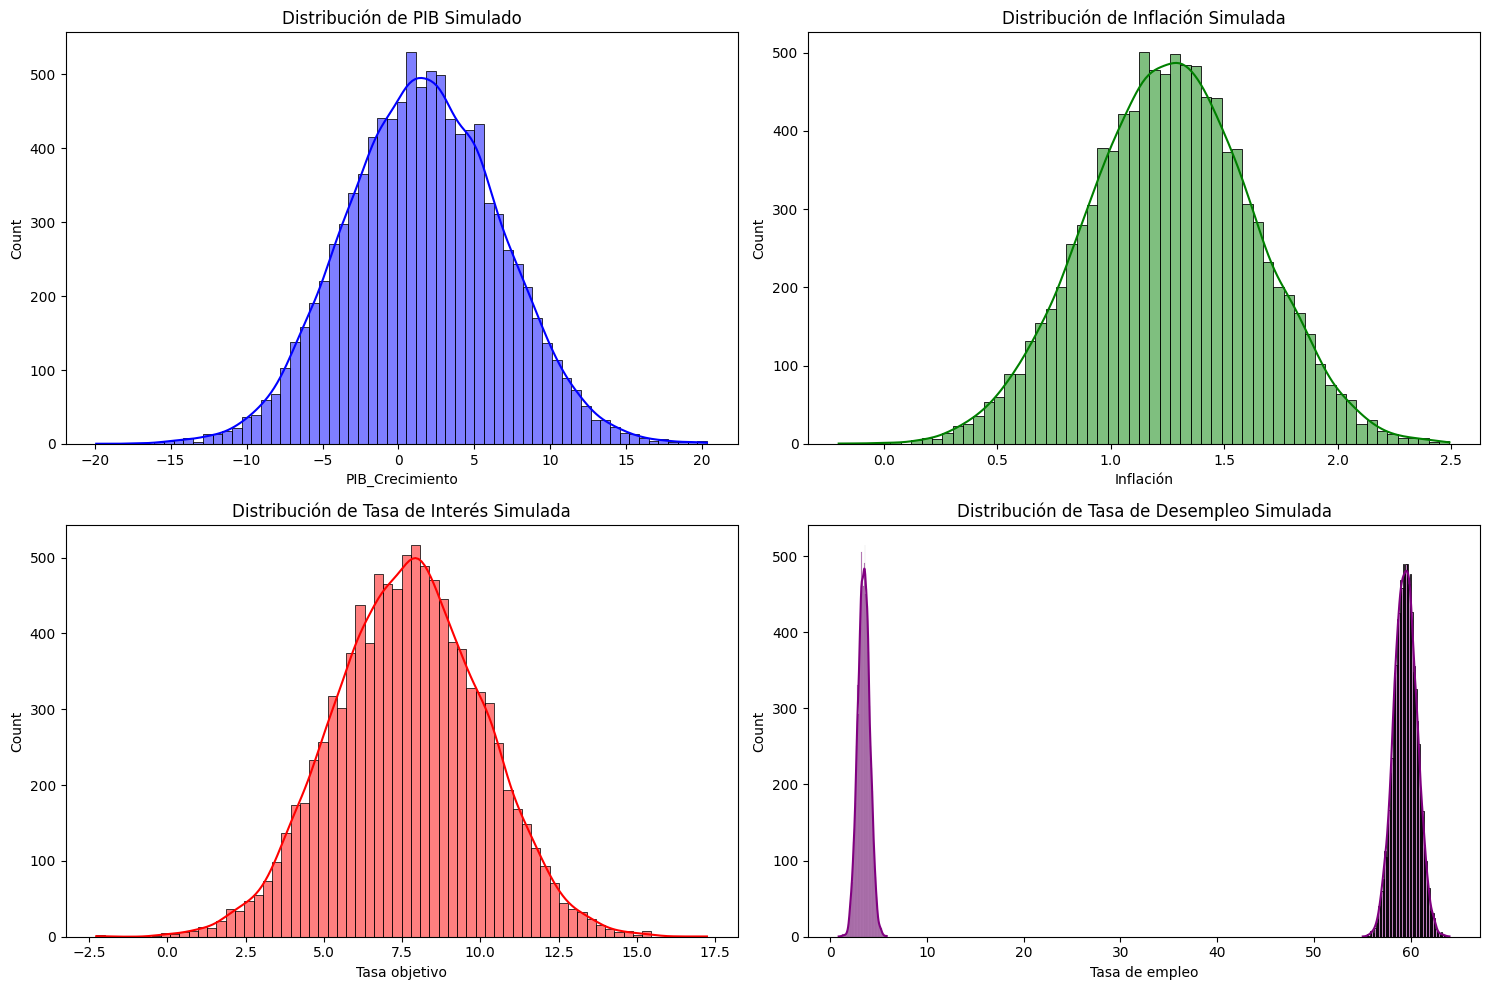

In [28]:
# Visualizamos las distribuciones de los datos simulados
plt.figure(figsize=(15, 10))

# Graficar PIB simulado
plt.subplot(2, 2, 1)
sns.histplot(df_simulado['PIB_Crecimiento'], kde=True, color='blue')
plt.title("Distribución de PIB Simulado")

# Graficar Inflación simulada
plt.subplot(2, 2, 2)
sns.histplot(df_simulado['Inflación'], kde=True, color='green')
plt.title("Distribución de Inflación Simulada")

# Graficar Tasa de Interés simulada
plt.subplot(2, 2, 3)
sns.histplot(df_simulado['Tasa objetivo'], kde=True, color='red')
plt.title("Distribución de Tasa de Interés Simulada")

# Graficar Tasa de Desempleo simulada
plt.subplot(2, 2, 4)
sns.histplot(df_simulado['Tasa de empleo'], kde=True, color='purple')
plt.title("Distribución de Tasa de empleo Simulada")

# Graficar Tasa de Desempleo simulada
plt.subplot(2, 2, 4)
sns.histplot(df_simulado['Tasa de desempleo'], kde=True, color='purple')
plt.title("Distribución de Tasa de Desempleo Simulada")

plt.tight_layout()
plt.show()


In [29]:

# Aplicamos la función a cada fila del DataFrame
df_simulado['Fase_Economica'] = df_simulado.apply(asignar_fase, axis=1)
df_simulado.tail(4)


PIB_Crecimiento  Inflación  Tasa objetivo  Tasa de empleo  \
9996         2.595004   1.324944       8.113253       61.030765   
9997         0.295980   1.217038       7.241503       58.446970   
9998         4.746649   0.910363       4.565286       61.024460   
9999         9.323155   1.293566      11.203767       60.259414   

      Tasa de desempleo Fase_Economica  
9996           4.317758       Recesión  
9997           3.406787       Recesión  
9998           2.596938         Normal  
9999           3.822110       Recesión

In [30]:
df_simulado['Fase_Economica'].value_counts()

Fase_Economica
Recesión     7568
Normal       2417
Depresión      15
Name: count, dtype: int64

### 1.2. Modelos para Asignar Probabilidades  

**Modelos de Regresión Logística**

Entrenamos un modelo con datos históricos, donde la variable objetivo es la fase económica (expansión, normal, recesión, depresión) y las variables predictoras son el PIB, inflación, tasas de interés y empleo.  

$$
P(Y = \text{Escenario} \mid X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \cdots + \beta_n X_n)}}
$$

Donde: $P(Y)$ es la probabilidad de estar en un escenario económico dado $X$ (las variables macroeconómicas).


$beta_0$ es el término independiente.

$beta_1$, $beta_2$, $dots$, $beta_n$ son los coeficientes que se estiman a partir de los datos históricos.

$X_1$, $X_2$, $dots$, $X_n$ son las variables explicativas (por ejemplo, PIB, tasa de interés, desempleo, etc.).


##### 📌 1.2.1 Preprocesamiento de Datos

In [31]:
# Codificar la variable categórica 'Fase_Economica' en números (Expansión=0, Normal=1, Recesión=2, Depresión=3)
label_encoder = LabelEncoder()
df_simulado['Fase_Economica'] = label_encoder.fit_transform(df_simulado['Fase_Economica'])

# Definir variables predictoras (X) y variable objetivo (y)
X = df_simulado[['PIB_Crecimiento', 'Inflación', 'Tasa objetivo', 'Tasa de empleo','Tasa de desempleo']]
y = df_simulado['Fase_Economica']

# Normalizar las variables predictoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [33]:
# Inicializar y entrenar el modelo de Regresión Logística Multiclase
modelo = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)
modelo.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Evaluación del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
#print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
#print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.879


c:\Users\julio_2h7cnt5\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [36]:

# Filtrar datos históricos de 2021 a 2023
df_backtest = indicadores

# Extraer las variables predictoras y la variable objetivo
X_backtest = df_backtest[['PIB_Crecimiento', 'Inflación', 'Tasa objetivo', 'Tasa de empleo','Tasa de desempleo']]
y_backtest_real = df_backtest['Fase_Economica']  # Fase económica real en esos años

# Normalizar los datos usando el mismo scaler entrenado
X_backtest_scaled = scaler.transform(X_backtest)

# Hacer predicciones con el modelo entrenado
y_backtest_pred = modelo.predict(X_backtest_scaled)

# Mostrar las predicciones
df_backtest['Fase_Predicha'] = label_encoder.inverse_transform(y_backtest_pred)
df_backtest[['Año', 'Fase_Economica', 'Fase_Predicha']]

Año Fase_Economica Fase_Predicha
1  2017-01-01       Recesión      Recesión
2  2017-01-04       Recesión      Recesión
3  2017-01-07       Recesión      Recesión
4  2017-01-10         Normal      Recesión
5  2018-01-01       Recesión      Recesión
6  2018-01-04         Normal      Recesión
7  2018-01-07       Recesión      Recesión
8  2018-01-10         Normal      Recesión
9  2019-01-01       Recesión      Recesión
10 2019-01-04       Recesión      Recesión
11 2019-01-07       Recesión      Recesión
12 2019-01-10       Recesión      Recesión
13 2020-01-01      Depresión     Depresión
14 2020-01-04      Depresión     Depresión
15 2020-01-07       Recesión      Recesión
16 2020-01-10       Recesión      Recesión
17 2021-01-01       Recesión      Recesión
18 2021-01-04       Recesión      Recesión
19 2021-01-07       Recesión      Recesión
20 2021-01-10         Normal      Recesión
21 2022-01-01       Recesión      Recesión
22 2022-01-04         Normal      Recesión
23 2022-01-07       Recesión      Recesión
24 2022-01-10         Normal        Normal
25 2023-01-01       Recesión      Recesión
26 2023-01-04         Normal        Normal
27 2023-01-07       Recesión        Normal
28 2023-01-10         Normal        Normal
29 2024-01-01       Recesión      Recesión
30 2024-01-04         Normal        Normal
31 2024-01-07       Recesión      Recesión
32 2024-01-10       Recesión      Recesión

In [37]:
# Suponiendo que el encoder se usó en el entrenamiento
label_encoder = LabelEncoder()
label_encoder.fit(['Expansión', 'Normal', 'Recesión', 'Depresión'])  # Reemplazar con las fases correctas

# Convertir predicciones numéricas a etiquetas de texto
y_backtest_pred_labels = label_encoder.inverse_transform(y_backtest_pred)

# Evaluar precisión del modelo en backtesting
accuracy = accuracy_score(y_backtest_real, y_backtest_pred_labels)
print(f'Precisión del modelo en backtesting: {accuracy:.2%}')

Precisión del modelo en backtesting: 21.88%


In [40]:
# Valores 2024 de PIB, Inflación, Tasa de interés y Desempleo
datos_actuales = np.array([[1.89, 4.88, 9.5,55,2.34]])  

# Normalizar los datos con el mismo scaler
datos_actuales_scaled = scaler.transform(datos_actuales)

# Obtener las probabilidades para cada fase económica
probabilidades = modelo.predict_proba(datos_actuales_scaled)

# Mostrar las probabilidades con los nombres de las fases
fases_economicas = label_encoder.classes_
prob_dict = dict(zip(fases_economicas, probabilidades[0]))

# Convertir el diccionario en un DataFrame
df = pd.DataFrame(list(prob_dict.items()), columns=['Fase Económica', 'Probabilidad'])

# Convertir los valores a porcentaje (multiplicar por 100)
df['Probabilidad (%)'] = df['Probabilidad'] * 100

# Formatear los valores para que se muestren con 2 decimales
df['Probabilidad (%)'] = df['Probabilidad (%)'].apply(lambda x: f"{x:.2f}%")

# Mostrar el DataFrame
df

c:\Users\julio_2h7cnt5\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Fase Económica  Probabilidad Probabilidad (%)
0      Depresión      0.000002            0.00%
1      Expansión      0.065613            6.56%
2         Normal      0.934385           93.44%

**2.3 Ponderación de Variables con un Modelo de PCA**

Las variables macroeconómicas se ponderan según su impacto en la economía

In [ ]:
# Seleccionamos las variables para PCA
variables = ['PIB_Crecimiento', 'Inflación', 'Tasa objetivo', 'Tasa de empleo', 'Tasa de desempleo']
X = df_simulado[variables]

# Estandarizamos las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicamos PCA
pca = PCA()
pca.fit(X_scaled)

# Obtenemos las cargas (loadings) de cada variable en las primeras componentes principales
cargas = pca.components_

# Calculamos los pesos (porcentaje de varianza explicada por cada componente)
varianza_explicada = pca.explained_variance_ratio_

# Calculamos el peso relativo de cada variable según su contribución
pesos_pca = abs(cargas[0]) * varianza_explicada[0]  # Primer componente principal
pesos_normalizados = pesos_pca / pesos_pca.sum()
pesos_a = list(pesos_normalizados)

# Mostrar los pesos calculados
print(pesos_normalizados)



In [ ]:

def clasificar_fase_economica_ponderada(row):
    # Asignación de pesos a cada variable macroeconómica
    pesos = {'PIB': pesos_a[0], 'Inflación': pesos_a[1], 'Empleo':pesos_a[2], 'Desempleo': pesos_a[3], 'Tasa objetivo': pesos_a[4]}


    # Función auxiliar para convertir valores en puntuaciones (0=Depresión, 1=Recesión, 2=Normal, 3=Expansión)
    def puntuar(valor, umbrales):
        if valor > umbrales[0]:
            return 3  # Expansión
        elif valor > umbrales[1]:
            return 2  # Normal
        elif valor > umbrales[2]:
            return 1  # Recesión
        else:
            return 0  # Depresión

    def calcular_umbrales(df_historial):
    # Calcular los percentiles para cada variable
        percentiles = {}
    
        percentiles['PIB'] = np.percentile(df_historial['PIB_Crecimiento'], [10, 50, 90])
        percentiles['Inflación'] = np.percentile(df_historial['Inflación'], [10, 50, 90])
        percentiles['Empleo'] = np.percentile(df_historial['Tasa de empleo'], [10, 50, 90])
        percentiles['Desempleo'] = np.percentile(df_historial['Tasa de desempleo'], [10, 50, 90])
        percentiles['Tasa objetivo'] = np.percentile(df_historial['Tasa objetivo'], [10, 50, 90])

        return percentiles

    # Calculando los umbrales con base en los datos históricos
    umbrales = calcular_umbrales(df_simulado)

    # Obtener puntuaciones ponderadas
    puntaje_total = (
        puntuar(row['PIB_Crecimiento'], umbrales['PIB']) * pesos['PIB'] +
        puntuar(row['Inflación'], umbrales['Inflación']) * pesos['Inflación'] +
        puntuar(row['Tasa de empleo'], umbrales['Empleo']) * pesos['Empleo'] +
        puntuar(row['Tasa de desempleo'], umbrales['Desempleo']) * pesos['Desempleo'] +
        puntuar(row['Tasa objetivo'], umbrales['Tasa objetivo']) * pesos['Tasa objetivo']
    )

    # Determinar la fase económica según el puntaje final
    if puntaje_total >= 2.5:
        return 'Expansión'
    elif puntaje_total >= 1.5:
        return 'Normal'
    elif puntaje_total >= 0.5:
        return 'Recesión'
    else:
        return 'Depresión'

# Suponiendo que df_simulado es tu DataFrame
df_simulado['Fase_Economica'] = df_simulado.apply(clasificar_fase_economica_ponderada, axis=1)



# Crear un gráfico interactivo con Plotly
fig = px.bar(df_simulado, 
             x='Fase_Economica', 
             title="Distribución de las Fases Económicas en los Datos Simulados",
             labels={'Fase_Economica': 'Fase Económica'},
             color='Fase_Economica', 
             category_orders={'Fase_Economica': ['Expansión', 'Normal', 'Recesión', 'Depresión']},
             color_discrete_map={'Expansión': 'green', 'Normal': 'yellow', 'Recesión': 'orange', 'Depresión': 'red'})

# Personalización adicional para hacer la gráfica más interactiva
fig.update_layout(
    xaxis_title="Fase Económica",
    yaxis_title="Cantidad de Registros",
    bargap=0.2,  # Espaciado entre las barras
    template="plotly_dark"  # Estilo visual (puedes cambiarlo a 'plotly', 'ggplot2', etc.)
)

# Mostrar el gráfico interactivo
fig.show()



**Ponderación de Variables**

Las variables macroeconómicas se ponderan según su impacto en la economía, y ahora incorporamos **Empleo** y **Desempleo**:

- **PIB (30%)** → Refleja directamente el crecimiento económico.  
- **Empleo (20%)** → Un mercado laboral robusto indica una economía fuerte.  
- **Desempleo (20%)** → Un aumento en la tasa de desempleo refleja debilidad estructural en la economía.  
- **Inflación (15%)** → Puede coexistir con crecimiento económico en ciertos casos.  
- **Tasas de interés (15%)** → Afectan el crédito y la inversión, pero no siempre determinan el ciclo económico.  



**Conversión a Puntajes**

Cada variable se convierte en un **puntaje de 0 a 3** según umbrales específicos:

**PIB**
- **PIB > 3%** → Puntaje 3 (*Expansión*).
- **PIB entre 1% y 3%** → Puntaje 2 (*Normal*).
- **PIB entre -1% y 1%** → Puntaje 1 (*Recesión*).
- **PIB < -1%** → Puntaje 0 (*Depresión*).

**Tasa de Empleo**  
Se utilizará la tasa de empleo en relación con los rangos corregidos:

- **Empleo > 60.63%** → Puntaje 3 (*Expansión*).
- **Empleo entre 58% y 60.63%** → Puntaje 2 (*Normal*).
- **Empleo entre 55.50% y 58%** → Puntaje 1 (*Recesión*).
- **Empleo < 55.50%** → Puntaje 0 (*Depresión*).

**Tasa de Desempleo**  
Se usará la tasa de desempleo de la siguiente manera:

- **Desempleo < 2.54%** → Puntaje 3 (*Expansión*).
- **Desempleo entre 2.54% y 3.5%** → Puntaje 2 (*Normal*).
- **Desempleo entre 3.5% y 4.5%** → Puntaje 1 (*Recesión*).
- **Desempleo > 4.5%** → Puntaje 0 (*Depresión*).

**Tasa de Interés**
Considerando que las tasas de interés se encuentran entre 0.8003% y 1.9214%, asignaremos puntajes a estas tasas de la siguiente manera:

- **Tasa de interés < 1%** → Puntaje 3 (*Expansión*).
- **Tasa de interés entre 1% y 1.5%** → Puntaje 2 (*Normal*).
- **Tasa de interés entre 1.5% y 1.8%** → Puntaje 1 (*Recesión*).
- **Tasa de interés > 1.8%** → Puntaje 0 (*Depresión*).

**Inflación**
- **Inflación > 4%** → Puntaje 3 (*Expansión*).
- **Inflación entre 2% y 4%** → Puntaje 2 (*Normal*).
- **Inflación entre 1% y 2%** → Puntaje 1 (*Recesión*).
- **Inflación <= 1%** → Puntaje 0 (*Depresión*).

**Cálculo del Puntaje Total**

El puntaje total se obtiene mediante una **media ponderada** de las puntuaciones de cada variable:

- **Puntaje Total = (Puntaje PIB * 0.30) + (Puntaje Empleo * 0.20) + (Puntaje Desempleo * 0.20) + (Puntaje Inflación * 0.15) + (Puntaje Tasa de Interés * 0.15)**

**Umbral para Determinar la Fase Económica**

| **Puntaje Total** | **Fase Económica** |
|-------------------|---------------------|
| **≥ 2.5**         | 🟢 **Expansión**     |
| **1.5 - 2.49**    | 🟡 **Normal**        |
| **0.5 - 1.49**    | 🟠 **Recesión**      |
| **< 0.5**         | 🔴 **Depresión**     |

$6.5 O MÁS
Torre Abitare
Akoya
Stelarhe
The O Residences
Escenica
Boca de Mar
Vigía Sky Tower


$6.4 O MENOS
Isla Diamante
Azora
Pacific Pearl Tower
Aguamarina Talismán- Torre Azul Vista al Mar
Sunset View Grand
El Encanto Roca del Mar
Playa Norte
Imperia Beach Tower
Litoral Ocean Condos
Malecón Ocean View
Torre Triana
Nereo The Black Tower of the Sea